### 지도학습 절차

- 지도학습 : 목표변수(Y)와 설명변수(X)의 관계를 학습해서, 새로운 X가 들어올 때, Y를 예측 / 분류

- 지도학습의 절차 6단계:
  1. 데이터 핸들링 (데이터 불러오기 / 파생변수 생성 / 층별화) : 데이터 구조적인 관점에서 학습을 수행할 수 있는 데이터셋을 구성하는 과정

  2. 학습에 사용될 목표변수(Y)와 설명변수(X)를 설정
    - 유의사항 : 사용되는 X는 새로 들어올 데이터에 대한 값으로 지정 ex. 신규고객 이탈 예측을 할 때 구매횟수와 방문횟수를 넣으면 안 됨.

  3. 학습 데이터(Train Set)와 검증 데이터(Test Set)분할
    - 검증 데이터(Test Set)는 학습에 참여하지 않는다! (교차검증에서 Validation Set과는 다른 개념)

  4. 학습을 수행 (Modeling)
    - 특성공학 (결측값 처리 / Encoding / Scaling ...) -> Pipe Line을 이용해서
    - 학습 (알고리즘)

  5. 학습된 모델 평가
    - 학습 능력 평가
    - 일반화 능력 평가


In [3]:
import numpy as np                  # 수치 계산/벡터·행렬 연산(NumPy)
import pandas as pd                 # 데이터프레임 생성·가공·요약(Pandas)

import matplotlib.pyplot as plt     # 기본 시각화 라이브러리(Matplotlib)
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정(그래프에서 한글 깨짐 방지)

!pip install koreanize-matplotlib   
import koreanize_matplotlib         # Matplotlib 한글 폰트/마이너스 기호 등 자동 설정

from IPython.display import display # 노트북에서 DataFrame 등을 예쁘게 출력할 때 사용

import seaborn as sns               # 통계 시각화(분포/관계/범주형 비교) 라이브러리(Seaborn)

- 사용한 데이터 (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [4]:
# 데이터 불러오기
df1 = pd.read_csv('diabetes.csv')
print(df1.shape)
print(df1.info())
print(df1.head())
print(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2         

In [5]:
# 환자의 건강 관련 정보를 입력했을 때, 당뇨병에 걸릴지 말지에 대한 판별 모델 생성
# 1) 데이터 핸들링
df1['Outcome'].unique()

array([1, 0], dtype=int64)

## **결측치는 없지만 0이 나올 수 있는 변수와 아닌 변수를 구분해서 EDA 할 것**

## **Pregrance**
 - 임신횟수

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

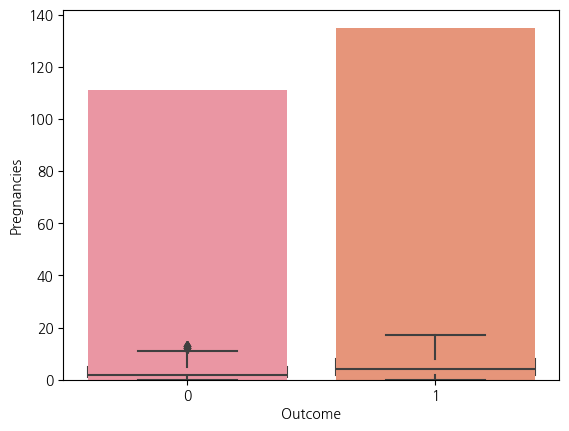

In [6]:
df1['Pregnancies'].describe()

sns.countplot(x='Pregnancies', data=df1)
sns.boxplot(x='Outcome', y='Pregnancies', data=df1)

### **변수 인사이트 정리**

당뇨 환자 집단에서 임신 횟수 중앙값이 더 높은 경향을 보인다.

## **glucose**
- 혈장 포도당 농도
- 사람 혈당이 0일 수는 없다.
- 당뇨는 혈당이 지속적으로 높은 증상

In [7]:
df1['Glucose'].describe()
(df1['Glucose'] == 0).sum()

5

Glucose 변수에서 0값이 존재하며, 이는 생리적으로 불가능한 값이므로 결측치로 해석할 수 있다.

C:\Users\donge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Outcome', ylabel='Glucose'>

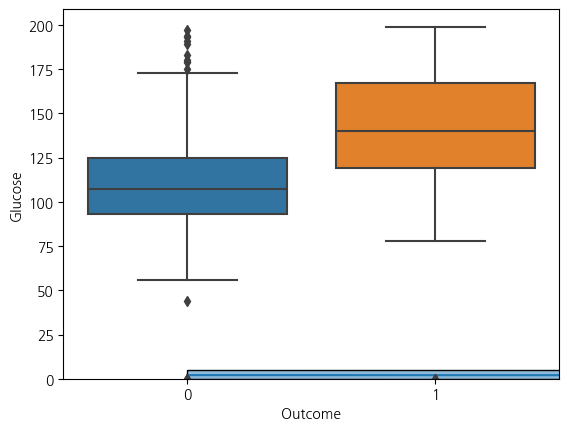

In [8]:
sns.histplot(df1['Glucose'], kde=True)
sns.boxplot(x='Outcome', y='Glucose', data=df1)

### **변수 인사이트 정리**

당뇨 환자는 비당뇨 집단에 비해 혈당 중앙값이 뚜렷하게 높다.
이는 혈당 수치가 당뇨병 진단에 있어 가장 중요한 변수임을 시사한다.

## **bloodpressure**
- 혈압
- 혈압도 0일 수는 없다 

In [9]:
df1['BloodPressure'].describe()
(df1['BloodPressure'] == 0).sum()

35

BloodPressure 변수에서도 0값이 다수 관측되며, 이는 실제 혈압 값으로 보기 어렵다.

C:\Users\donge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Outcome', ylabel='BloodPressure'>

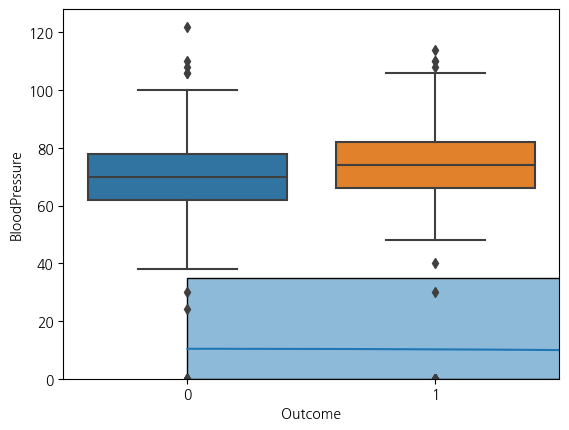

In [10]:
sns.histplot(df1['BloodPressure'], kde=True)
sns.boxplot(x='Outcome', y='BloodPressure', data=df1)

### **변수 인사이트 정리**

당뇨 여부에 따른 혈압 차이는 혈당에 비해 상대적으로 크지 않다.
따라서 혈압은 보조적인 위험 요인으로 작용할 가능성이 있다.

## **SkinThickness**
- 삼두근 피부 두께
- 체지방이란 관련이 있다.
- 0일 수 없다

In [11]:
df1['SkinThickness'].describe()
(df1['SkinThickness'] == 0).sum()

227

SkinThickness 변수는 0값이 매우 많아, 실제 측정되지 않은 경우가 많았을 가능성이 크다.

C:\Users\donge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Outcome', ylabel='SkinThickness'>

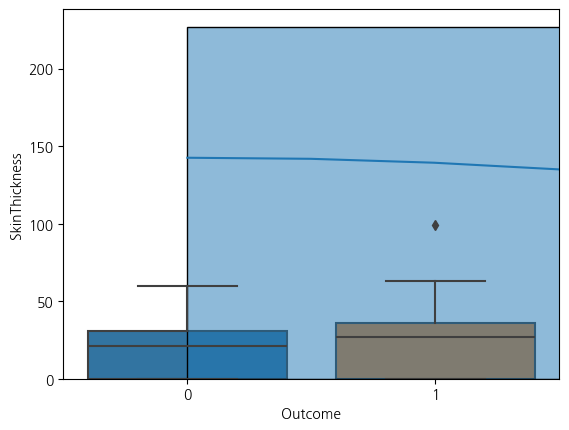

In [12]:
sns.histplot(df1['SkinThickness'], kde=True)
sns.boxplot(x='Outcome', y='SkinThickness', data=df1)

### **변수 인사이트 정리**

당뇨 여부에 따른 분포 차이는 존재하지만 명확한 구분은 어렵다.

## **Insulin**
- 인슐린 분비량
- 당뇨병 유형은 인슐린이 선천적으로 나오지 않는 사람(1형)과 인슐린이 나오지만 인식을 못하는 사람(2형) 당뇨병 두가지가 있다.  

In [13]:
df1['Insulin'].describe()
(df1['Insulin'] == 0).sum()

374

Insulin 변수는 0값이 매우 많아 결측치 문제가 가장 심각하다.

C:\Users\donge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Outcome', ylabel='Insulin'>

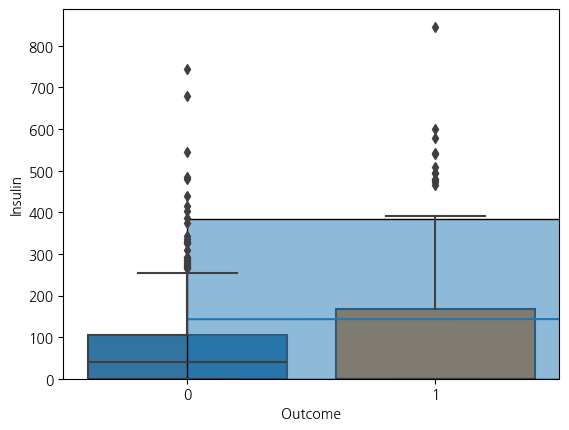

In [14]:
sns.histplot(df1['Insulin'], kde=True)
sns.boxplot(x='Outcome', y='Insulin', data=df1)

### **변수 인사이트 정리**


분포에서 이상치가 다수 존재한다.
당뇨 환자의 경우 인슐린 수치 변동 폭이 더 큰 경향을 보인다.

## **BMI**
- 0이 나올 수 없는 값

In [15]:
df1['BMI'].describe()
(df1['BMI'] == 0).sum()

11

BMI 변수 역시 0값은 생리적으로 불가능하므로 결측치로 판단된다.

C:\Users\donge\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Outcome', ylabel='BMI'>

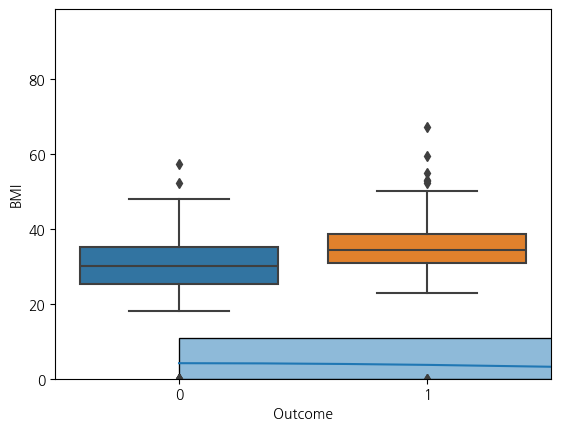

In [16]:
sns.histplot(df1['BMI'], kde=True)
sns.boxplot(x='Outcome', y='BMI', data=df1)

### **변수 인사이트 정리**

당뇨 환자는 비당뇨 집단 대비 BMI 중앙값이 높다.
비만이 당뇨병 위험 요인임을 데이터로 확인할 수 있다.

## **파생변수 생성 및 추가 전처리**

### **0값 -> 결측치 처리 (Glucose, BloodPressure, SkinThickness, Insulin, BMI)**

In [17]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df1[zero_cols] = df1[zero_cols].replace(0, np.nan)

해당 변수들은 생리적으로 0이 될 수 없으므로, 0값을 결측치(NaN)로 변환하였다.

### **결측치 대체 (Median)** ###

In [18]:
for col in zero_cols:
    df1[col].fillna(df1[col].median(), inplace=True)

결측치는 각 변수의 중앙값으로 대체하여 이상치 영향을 최소화하였다.

### **고혈당 여부 변수 생성** ###

기준: 공복혈당 126 이상 --> 고혈당

In [19]:
df1['HighGlucose'] = (df1['Glucose'] >= 126).astype(int)

### **비만 여부 변수 생성** ###

기준: BMI 30 이상 --> 비만

In [20]:
df1['Obesity'] = (df1['BMI'] >= 30).astype(int)

# **모델링하기**

In [21]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기

X = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [22]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [23]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 629            4     94.0           65.0           22.0    125.0  24.7   
 485            0    135.0           68.0           42.0    250.0  42.3   
 505           10     75.0           82.0           29.0    125.0  33.3   
 205            5    111.0           72.0           28.0    125.0  23.9   
 272            3    122.0           78.0           29.0    125.0  23.0   
 ..           ...      ...            ...            ...      ...   ...   
 728            2    175.0           88.0           29.0    125.0  22.9   
 561            0    198.0           66.0           32.0    274.0  41.3   
 472            0    119.0           66.0           27.0    125.0  38.8   
 121            6    111.0           64.0           39.0    125.0  34.2   
 222            7    119.0           72.0           29.0    125.0  25.2   
 
      DiabetesPedigreeFunction  Age  
 629                     0.148   21  
 485                  

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [25]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

=> X에도 결측치가 없는 데이터이지만, 추후 새로 들어올 데이터에 결측치가 존재할 수 있음

# **각자 공부한 모델 쓰기**

### Gradient Boosting
    
여러 개의 약한 결정트리를 이전 모델의 오류를 보완하는 방향(gradient)으로 순차적으로 학습하는 앙상블 모델이다.

→ 당뇨병처럼 비선형 + 변수 간 상호작용 있는 데이터에 잘 맞음.

In [26]:
# 4) 학습 수행
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [27]:
model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=42
)
model.fit(X_train, Y_train) # 학습 수행

GradientBoostingClassifier(random_state=42)

In [28]:
# 5) 성능 확인
from sklearn.metrics import accuracy_score
# 정확도 : 전체 데이터 중 얼만큼 정확히 분류했는지 비율

In [29]:
Y_train_pred = model.predict(X_train)

In [30]:
Y_test_pred = model.predict(X_test)

In [31]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 여러 알고리즘에 대한 모델을 비교할 때 확인해야 함
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred))

학습 정확도 :  0.9149305555555556
검증 정확도 :  0.6979166666666666


### 과적합(Overfitting)

- 과적합 : 학습 데이터에 대해서는 Model이 높은 성능을 나타내지만, 검증데이터에서는 성능이 낮게 나오는 현상
- 해결 : 특성공학을 통해 데이터를 더 깔끔하게 생성

### 특성공학(Feature Engineering)
- **특성공학** : 학습의 목적에 맞게(학습이 잘 수행될 수 있도록) 데이터를 깔끔하게 다듬는 작업
- 대표적 기법 : 
  1. Scaling & Encoding : 숫자 데이터의 스케일을 맞추거나, 문자 데이터를 숫자로 변환하여 학습에 사용
  2. Imputation : 데이터 상에 존재하는 결측값에 대해 다른 값으로 대치 (새로 들어오는 데이터가 결측일 수도 있기 때문에)
  3. Cross Validation (교차검증): 학습데이터를 여러 단계로 나누어 분할하여 학습
  4. Hyper Parameter Tuning : 학습 알고리즘 내 존재하는 수학적 구조나 학습에 발생하는 구조, 함수들을 사용자가 통제
  5. Imbalanced Data Sampling : 목표변수의 비율이 깨져있는 데이터를 맞추어 학습
  6. Feature Selection : 목표변수에 가장 영향이 있는 인자를 사용자가 지정한 만큼 선택해서 학습
  7. PCA : 데이터의 차원을 줄이거나 특성을 재구성하여 학습

- Scikit Learn에서 특성공학 기법과 학습을 동시에 수행할 수 있게 Pipe Line 구성하여 학습을 수행

In [32]:
# 4) 학습 수행
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
# 파이프라인 구조 설계

model_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

model_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier(random_state=42))])

-> 파이프라인을 사용하면 전처리와 학습 과정을 하나의 객체로 관리할 수 있어 데이터 누수를 방지할 수 있다.

#### **공부한 모델의 하이퍼파라미터**

- n_estimators
  -> 트리 개수 (클수록 복잡 ↑, 과적합 위험 ↑)
- learning_rate
  -> 한 트리가 반영되는 정도
  -> 작을수록 안정적, 대신 트리 많이 필요
- max_depth
  -> 각 트리의 깊이
  -> 보통 3~4가 정석 (Gradient Boosting은 약한 트리)
- subsample
  -> 일부 데이터만 써서 학습
  -> 1.0보다 작으면 과적합 방지 효과 좋음

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# 하이퍼파라미터 튜닝 및 교차검증
hyperparam = {
    'gb__learning_rate': [0.05, 0.1],
    'gb__n_estimators': [100, 200],
    'gb__max_depth': [3, 4],
    'gb__subsample': [0.8, 1.0]
}

grid_model1 = GridSearchCV(
    model_pipe,
    param_grid=hyperparam,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

# 학습
grid_model1.fit(X_train, Y_train)

# 최적 모델
best_model1 = grid_model1.best_estimator_

accuracy 대신 f1-score 사용.

In [36]:
best_model1

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=4,
                                            n_estimators=200, random_state=42,
                                            subsample=0.8))])

In [37]:
from sklearn.metrics import classification_report

In [38]:
# 5) 평가
Y_train_pred = best_model1.predict(X_train) # 학습 데이터의 예측값 계산
Y_test_pred = best_model1.predict(X_test) # 검증데이터의 예측값 계산

In [39]:
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       379
           1       0.99      0.98      0.98       197

    accuracy                           0.99       576
   macro avg       0.99      0.99      0.99       576
weighted avg       0.99      0.99      0.99       576



In [40]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       121
           1       0.67      0.55      0.60        71

    accuracy                           0.73       192
   macro avg       0.72      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



Gradient Boosting은 약한 학습기를 순차적으로 학습하여 성능을 개선하는 앙상블 모델이며,
Pipeline과 GridSearchCV를 활용해 데이터 누수 방지 및 최적의 하이퍼파라미터를 탐색하였다.

# **성능을 높이기 위한 방안**

1. test 데이터의 정확도가 test 데이터의 정확도보다 많이 낮으면 과적합
2. 하이퍼파라미터 튜닝, 추가적인 전처리(변수 제거) 혹은 파생변수 생성 으로 이를 해결 할 수 있다.  